In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,LabelEncoder


In [34]:
df = sns.load_dataset('titanic')
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X['deck'].isnull().sum()/len(X['deck'])*100)
X.head(2)

77.21661054994388


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [35]:
x = X.drop(columns=['deck'])
x['age'] = x['age'].fillna(x['age'].median())
x['embark_town'] = x['embark_town'].fillna(x['embark_town'].mode()[0])
x['embarked'] = x['embarked'].fillna(x['embarked'].mode()[0])
for col in x.columns:
    if x[col].dtype == 'object' or x[col].dtype == 'category':
        x[col] = LabelEncoder().fit_transform(x[col])
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
ml_model = LogisticRegression(max_iter=1000)
ml_model.fit(X_train, y_train)
y_pred = ml_model.predict(X_test)


In [37]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Confusion Matrix:
[[112   0]
 [  0  67]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        67

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(50.722222222222214, 0.5, 'Actual')

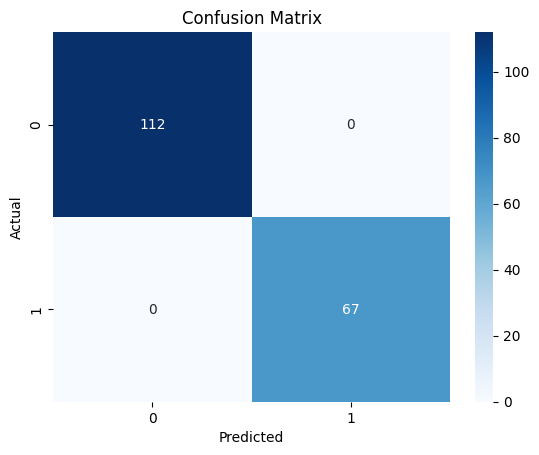

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [39]:
pickle.dump(ml_model, open('./saved_models/BinaryLogisticRegression_3', 'wb'))